In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time

In [84]:
#pip install neuralcoref

In [80]:
df_movie = pd.read_table("movie.metadata.tsv", header = None)
df_movie.columns = ['Wiki movie ID', 'Free movie ID', 'Name', 'Release date', 'Box office revenue', 'Runtime', 'Languages','Countries', 'Genres']
df_movie.head(3)

,Wiki movie ID,Free movie ID,Name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [81]:
df_movie['Languages'] = [lang.split('"')[3::4] for lang in df_movie.Languages]
df_movie['Countries'] = [lang.split('"')[3::4] for lang in df_movie.Countries]
df_movie['Genres'] = [lang.split('"')[3::4] for lang in df_movie.Genres]

df_movie = df_movie[df_movie['Release date'].notna()]
df_movie['Release date'] = df_movie['Release date'].apply(lambda x : datetime.strptime(str(x)[0:4],"%Y")) #keeping only the year
df_movie['Release date'] = [date.year for date in df_movie['Release date']]  #Expliquer pourquoi on garde que l'année

In [82]:
min(df_movie['Release date'])

1010

We discovered an error in one of the dates of the movies. Indeed, the earliest movie in the dataset is from 1010, however this is not possible. Thus, we looked for the true release date of this movie by using its name and origin. We found that its release year is actually 2010 thus we assume that there was simply a mistake in the first number. Now that we have the true year of release, we modify the value in the data.

In [83]:
df_movie = df_movie.replace(1010, 2010)

In [84]:
df_movie[df_movie['Name'] == 'Hunting Season']

,Wiki movie ID,Free movie ID,Name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
62836,29666067,/m/0fphzrf,Hunting Season,2010,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]"


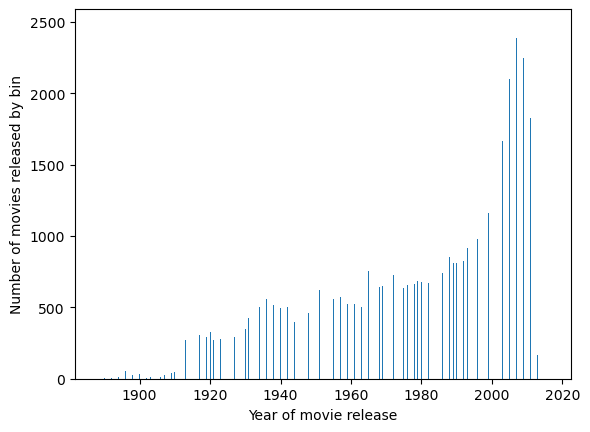

In [85]:
plt.hist(df_movie['Release date'], bins = 1000)
plt.xlabel('Year of movie release')
plt.ylabel('Number of movies released by bin')
plt.show()

(array([6.129e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([      0. ,  107928.1,  215856.2,  323784.3,  431712.4,  539640.5,
         647568.6,  755496.7,  863424.8,  971352.9, 1079281. ]),
 <BarContainer object of 10 artists>)

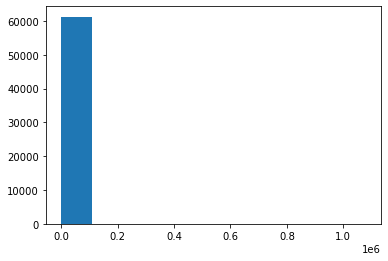

In [69]:
#Not important for us
plt.hist(df_movie['Runtime'], bins = 10)
plt.show()

In [ ]:
plt.hist(df_movie['Languages'])
plt.show()

In [75]:
categ_df = df_movie.groupby(df_movie['Languages']).count

In [73]:
categ_df

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000023DD6806580>>

In [ ]:
boxplot
describe

In [196]:
#Characters data
df_characters = pd.read_table("character.metadata.tsv", header = None)
df_characters.columns = ['Wiki movie ID', 'Free movie ID', 'Release date', 'Character name', 'Actor DOB', 'Gender', 'Height', 'Ethnicity', 'Actor name', 'Age at release', 'Charac/actor map', 'Free charac ID ', 'Free actor ID']
df_characters.head(3)

,Wiki movie ID,Free movie ID,Release date,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,Charac/actor map,Free charac ID,Free actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l


In [197]:
df_characters = df_characters[df_characters['Release date'].notna()]
df_characters['Release date'] = df_characters['Release date'].apply(lambda x : datetime.strptime(str(x)[0:4],"%Y")) #keeping only the year
df_characters['Release date'] = [date.year for date in df_characters['Release date']]  #Expliquer pourquoi on garde que l'année
df_characters = df_characters.replace(1010, 2010)

In [198]:
df_characters[df_characters['Wiki movie ID'] == 29666067].head(2)

,Wiki movie ID,Free movie ID,Release date,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,Charac/actor map,Free charac ID,Free actor ID
67624,29666067,/m/0fphzrf,2010,Kamuran,1983,M,NaN,NaN,Bartu Küçükçaglayan,NaN,/m/0n4fxh5,/m/0n4fxh8,/m/0df0qkt
67625,29666067,/m/0fphzrf,2010,Ferman,1941-12-26,M,NaN,NaN,Şener Şen,NaN,/m/0gb33kh,/m/0n4fgzm,/m/02z247j


In [199]:
merged_charac = pd.merge(left = df_characters, right = df_movie, on = 'Wiki movie ID', how = 'left')
merged_charac.head(5)

,Wiki movie ID,Free movie ID_x,Release date_x,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,...,Free charac ID,Free actor ID,Free movie ID_y,Name,Release date_y,Box office revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,2001,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,/m/0bgcj3x,/m/03wcfv7,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0bgchn4,/m/0346l4,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
2,975900,/m/03vyhn,2001,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/0bgchn_,/m/01vw26l,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,/m/0bgchnq,/m/034hyc,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,/m/0bgchp9,/m/01y9xg,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."


In [200]:
#Taking first genre mentionned as main genre, ignoring rows with no genre
merged_charac['Main genre'] = merged_charac['Genres'].apply(lambda x :x[0] if (x != []) else None) 

In [201]:
df_characters_F = merged_charac[merged_charac['Gender'] == 'F']
df_characters_M = merged_charac[merged_charac['Gender'] == 'M']

In [202]:
Nb_charac_F = df_characters_F.groupby('Release date_x').count()
Nb_charac_M = df_characters_M.groupby('Release date_x').count()
Nb_charac_M.head(3)

,Wiki movie ID,Free movie ID_x,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,Charac/actor map,...,Free actor ID,Free movie ID_y,Name,Release date_y,Box office revenue,Runtime,Languages,Countries,Genres,Main genre
Release date_x,,,,,,,,,,,,,,,,,,,,,
1888,2,2,0,0,2,0,0,2,0,2,...,2,2,2,2,0,2,2,2,2,2
1891,1,1,0,1,1,0,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
1893,2,2,0,1,2,0,0,2,0,2,...,2,2,2,2,0,2,2,2,2,2


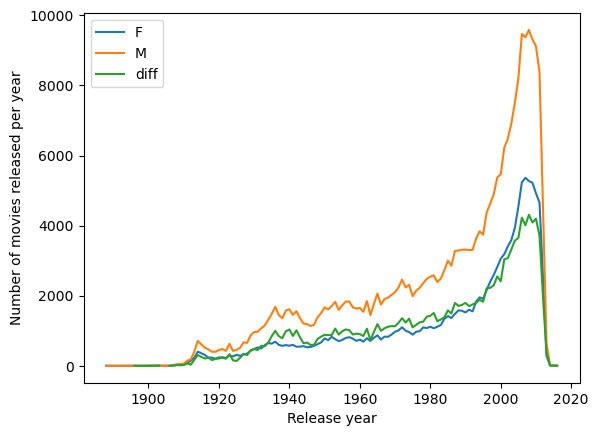

In [238]:
plt.plot(Nb_charac_F['Wiki movie ID'], label = 'F')
plt.plot(Nb_charac_M['Wiki movie ID'], label = 'M')
plt.plot(Nb_charac_M['Wiki movie ID'] - Nb_charac_F['Wiki movie ID'], label = 'diff')
plt.ylabel('Number of movies released per year')
plt.xlabel('Release year')
plt.legend()
plt.show()

In [158]:
genre_ex = merged_charac['Genres'][0]
genre_ex[0]

'Thriller'

In [193]:
empty_genre = merged_charac[merged_charac['Wiki movie ID'] == 32456683]

In [215]:
F_genre = df_characters_F.groupby('Main genre').count()
M_genre = df_characters_M.groupby('Main genre').count()

F_genre = F_genre.sort_values('Wiki movie ID', axis = 0, ascending = False)
M_genre = M_genre.sort_values('Wiki movie ID', axis = 0, ascending = False)

F_genre.head(3)

,Wiki movie ID,Free movie ID_x,Release date_x,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,...,Free charac ID,Free actor ID,Free movie ID_y,Name,Release date_y,Box office revenue,Runtime,Languages,Countries,Genres
Main genre,,,,,,,,,,,,,,,,,,,,,
Drama,18122,18122,18122,8772,14360,18122,5630,4070,18122,13048,...,8772,18122,18122,18122,18122,2085,15405,18122,18122,18122
Thriller,17385,17385,17385,10198,14566,17385,8630,4796,17385,13811,...,10198,17385,17385,17385,17385,5830,16459,17385,17385,17385
Romantic comedy,9286,9286,9286,5355,8234,9286,5422,3053,9286,7776,...,5355,9286,9286,9286,9286,4243,9134,9286,9286,9286


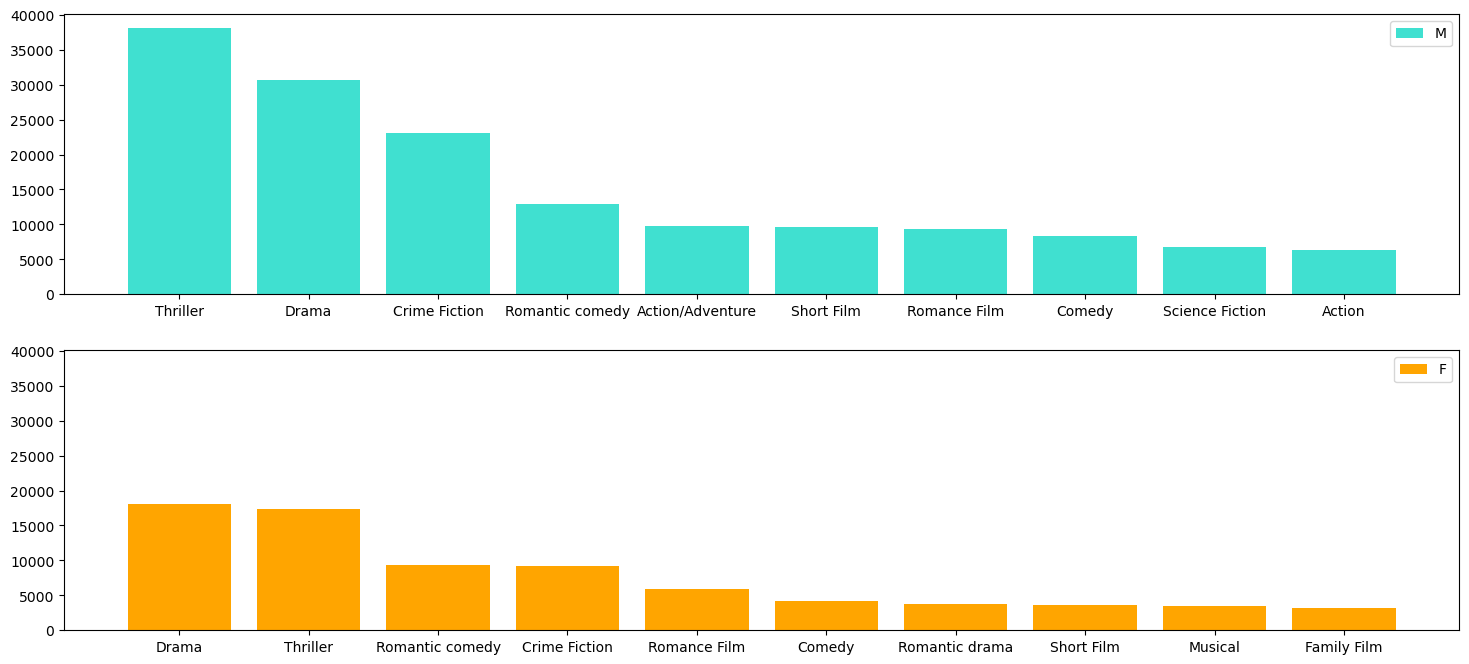

In [250]:
fig, ax = plt.subplots(2,1, figsize = (18,8), sharey = True)   #share x ??

ax[0].bar(M_genre.index[0:10], M_genre['Wiki movie ID'][0:10], label = 'M', color = 'turquoise')
ax[0].legend()
ax[1].bar(F_genre.index[0:10], F_genre['Wiki movie ID'][0:10], label = 'F', color = 'orange')
ax[1].legend()
plt.show()

Ce serait intéressant de voir l'évolution de drama, thriller and crime fiction dans le temps

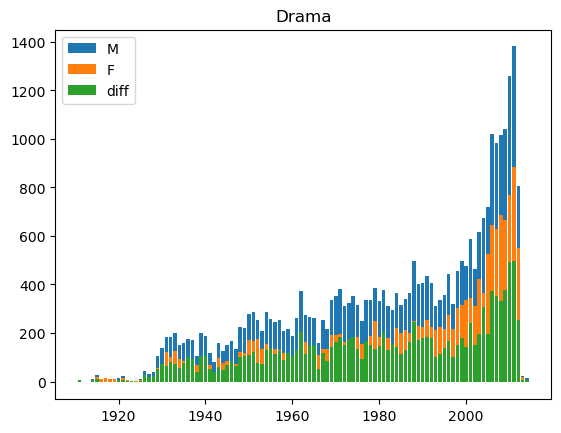

In [276]:
M_drama = df_characters_M[df_characters_M['Main genre'] == 'Drama']
M_drama_year = M_drama.groupby('Release date_x').count()
plt.bar(M_drama_year.index, M_drama_year['Wiki movie ID'], label = 'M')

F_drama = df_characters_F[df_characters_F['Main genre'] == 'Drama']
F_drama_year = F_drama.groupby('Release date_x').count()
plt.bar(F_drama_year.index, F_drama_year['Wiki movie ID'], label = 'F')

plt.bar(F_drama_year.index, M_drama_year['Wiki movie ID'] - F_drama_year['Wiki movie ID'], label = 'diff')
plt.title('Drama')
plt.legend()
plt.show()

La différence en vert permet de voir que l'augmentation des hommes est plus grandes que celles des femmes

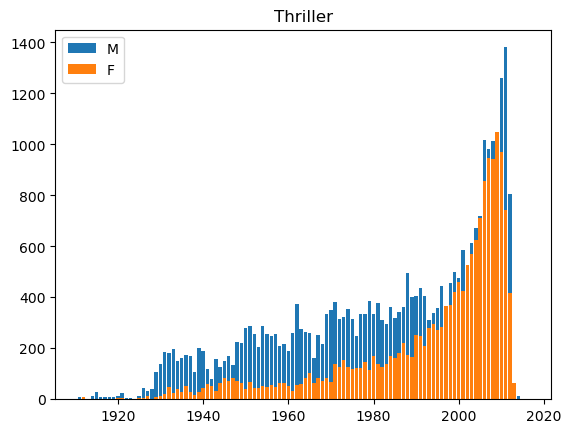

In [277]:
M_thriller = df_characters_M[df_characters_M['Main genre'] == 'Thriller']
M_thriller_year = M_drama.groupby('Release date_x').count()
plt.bar(M_thriller_year. index, M_thriller_year['Wiki movie ID'], label = 'M')

F_thriller = df_characters_F[df_characters_F['Main genre'] == 'Thriller']
F_thriller_year = F_thriller.groupby('Release date_x').count()
plt.bar(F_thriller_year. index, F_thriller_year['Wiki movie ID'], label = 'F')

#plt.bar(F_thriller_year.index, M_thriller_year['Wiki movie ID'] - F_thriller_year['Wiki movie ID'], label = 'diff')

plt.title('Thriller')
plt.legend()
plt.show()

On voit que l'augmentation des femmes est plus grande que celle des hommes.

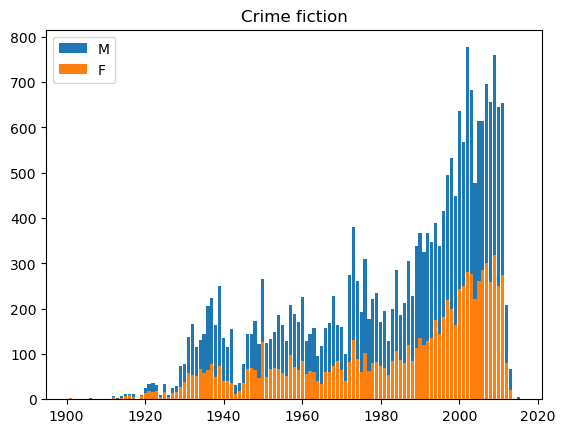

In [280]:
M_CF = df_characters_M[df_characters_M['Main genre'] == 'Crime Fiction']
M_CF_year = M_CF.groupby('Release date_x').count()
plt.bar(M_CF_year.index, M_CF_year['Wiki movie ID'], label = 'M')

F_CF = df_characters_F[df_characters_F['Main genre'] == 'Crime Fiction']
F_CF_year = F_CF.groupby('Release date_x').count()
plt.bar(F_CF_year.index, F_CF_year['Wiki movie ID'], label = 'F')

#plt.bar(F_CF_year.index, M_CF_year['Wiki movie ID'] - F_CF_year['Wiki movie ID'], label = 'diff')

plt.title('Crime fiction')
plt.legend()
plt.show()

On voit que l'augmentation des hommes est bien plus grande chez les hommes que les femmes.

Est-ce qu'il existe une mesure pour mesurer l'augmentation ?